In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Object Creation
Creating a Series by passing a list of values, letting pandas create a default integer index

In [2]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.635108,1.837514,0.087154,0.925198
2013-01-02,-0.048953,-0.463350,-1.593900,1.220919
2013-01-03,-0.123304,-0.260531,-2.132915,0.157073
2013-01-04,0.214781,0.593741,-2.106998,-1.287113
2013-01-05,-0.201937,-0.572470,-0.179869,0.645570
2013-01-06,1.212616,0.079161,-1.199847,-1.709307


Creating a DataFrame by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({ 
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
    'D' : np.array([3] * 4,dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1,2013-01-02,1,3,test,foo
1,1,2013-01-02,1,3,train,foo
2,1,2013-01-02,1,3,test,foo
3,1,2013-01-02,1,3,train,foo


In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:
df2.<TAB>
df2.A                  df2.bool
df2.abs                df2.boxplot
df2.add                df2.C
df2.add_prefix         df2.clip
df2.add_suffix         df2.clip_lower
df2.align              df2.clip_upper
df2.all                df2.columns
df2.any                df2.combine
df2.append             df2.combine_first
df2.apply              df2.compound
df2.applymap           df2.consolidate
df2.as_blocks          df2.convert_objects
df2.asfreq             df2.copy
df2.as_matrix          df2.corr
df2.astype             df2.corrwith
df2.at                 df2.count
df2.at_time            df2.cov
df2.axes               df2.cummax
df2.B                  df2.cummin
df2.between_time       df2.cumprod
df2.bfill              df2.cumsum
df2.blocks             df2.D


# Viewing Data
See the top & bottom rows of the frame

In [7]:
df.head()

,A,B,C,D
2013-01-01,0.635108,1.837514,0.087154,0.925198
2013-01-02,-0.048953,-0.463350,-1.593900,1.220919
2013-01-03,-0.123304,-0.260531,-2.132915,0.157073
2013-01-04,0.214781,0.593741,-2.106998,-1.287113
2013-01-05,-0.201937,-0.572470,-0.179869,0.645570


In [8]:
df.tail()

,A,B,C,D
2013-01-02,-0.048953,-0.463350,-1.593900,1.220919
2013-01-03,-0.123304,-0.260531,-2.132915,0.157073
2013-01-04,0.214781,0.593741,-2.106998,-1.287113
2013-01-05,-0.201937,-0.572470,-0.179869,0.645570
2013-01-06,1.212616,0.079161,-1.199847,-1.709307


Display the index, columns, and the underlying numpy data

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [11]:
df.values

array([[ 0.63510844,  1.83751377,  0.0871544 ,  0.92519795],
       [-0.04895294, -0.46334959, -1.59390028,  1.22091902],
       [-0.12330389, -0.26053072, -2.13291541,  0.15707322],
       [ 0.21478092,  0.59374112, -2.10699783, -1.28711332],
       [-0.20193701, -0.57246999, -0.1798694 ,  0.64556969],
       [ 1.21261638,  0.07916066, -1.19984708, -1.70930748]])

Describe shows a quick statistic summary of your data

In [12]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.281385,0.202344,-1.187729,-0.007943
std,0.548315,0.905526,0.953380,1.213761
min,-0.201937,-0.572470,-2.132915,-1.709307
25%,-0.104716,-0.412645,-1.978723,-0.926067
50%,0.082914,-0.090685,-1.396874,0.401321
75%,0.530027,0.465096,-0.434864,0.855291
max,1.212616,1.837514,0.087154,1.220919


Transposing your data

In [13]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,0.635108,-0.048953,-0.123304,0.214781,-0.201937,1.212616
B,1.837514,-0.463350,-0.260531,0.593741,-0.572470,0.079161
C,0.087154,-1.593900,-2.132915,-2.106998,-0.179869,-1.199847
D,0.925198,1.220919,0.157073,-1.287113,0.645570,-1.709307


Sorting by an axis

In [14]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.925198,0.087154,1.837514,0.635108
2013-01-02,1.220919,-1.593900,-0.463350,-0.048953
2013-01-03,0.157073,-2.132915,-0.260531,-0.123304
2013-01-04,-1.287113,-2.106998,0.593741,0.214781
2013-01-05,0.645570,-0.179869,-0.572470,-0.201937
2013-01-06,-1.709307,-1.199847,0.079161,1.212616


Sorting by values

In [15]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,-0.201937,-0.572470,-0.179869,0.645570
2013-01-02,-0.048953,-0.463350,-1.593900,1.220919
2013-01-03,-0.123304,-0.260531,-2.132915,0.157073
2013-01-06,1.212616,0.079161,-1.199847,-1.709307
2013-01-04,0.214781,0.593741,-2.106998,-1.287113
2013-01-01,0.635108,1.837514,0.087154,0.925198


# Selection
__Note__:
 While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.
 

# Getting
Selecting a single column, which yields a Series, equivalent to df.A

In [16]:
df['A']

2013-01-01    0.635108
2013-01-02   -0.048953
2013-01-03   -0.123304
2013-01-04    0.214781
2013-01-05   -0.201937
2013-01-06    1.212616
Freq: D, Name: A, dtype: float64

Selecting via [], which slices the rows.

In [17]:
df[0:3]

,A,B,C,D
2013-01-01,0.635108,1.837514,0.087154,0.925198
2013-01-02,-0.048953,-0.463350,-1.593900,1.220919
2013-01-03,-0.123304,-0.260531,-2.132915,0.157073


In [18]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.048953,-0.463350,-1.593900,1.220919
2013-01-03,-0.123304,-0.260531,-2.132915,0.157073
2013-01-04,0.214781,0.593741,-2.106998,-1.287113


# Selection by Label
For getting a cross section using a label

In [19]:
df.loc[dates[0]]

A    0.635108
B    1.837514
C    0.087154
D    0.925198
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label

In [20]:
df.loc[:,['A','B']]

,A,B
2013-01-01,0.635108,1.837514
2013-01-02,-0.048953,-0.463350
2013-01-03,-0.123304,-0.260531
2013-01-04,0.214781,0.593741
2013-01-05,-0.201937,-0.572470
2013-01-06,1.212616,0.079161


Showing label slicing, both endpoints are included

In [21]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.048953,-0.463350
2013-01-03,-0.123304,-0.260531
2013-01-04,0.214781,0.593741


Reduction in the dimensions of the returned object

In [22]:
df.loc['20130102',['A','B']]

A   -0.048953
B   -0.463350
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [23]:
df.loc[dates[0],'A']

0.6351084437385196

For getting fast access to a scalar (equiv to the prior method)

In [24]:
df.at[dates[0],'A']

0.6351084437385196

# Selection by Position
Select via the position of the passed integers

In [25]:
df.iloc[3]

A    0.214781
B    0.593741
C   -2.106998
D   -1.287113
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to numpy/python

In [26]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.214781,0.593741
2013-01-05,-0.201937,-0.572470


By lists of integer position locations, similar to the numpy/python style

In [27]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.048953,-1.593900
2013-01-03,-0.123304,-2.132915
2013-01-05,-0.201937,-0.179869


For slicing rows explicitly

In [28]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.048953,-0.463350,-1.593900,1.220919
2013-01-03,-0.123304,-0.260531,-2.132915,0.157073


For slicing columns explicitly

In [29]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.837514,0.087154
2013-01-02,-0.463350,-1.593900
2013-01-03,-0.260531,-2.132915
2013-01-04,0.593741,-2.106998
2013-01-05,-0.572470,-0.179869
2013-01-06,0.079161,-1.199847


For getting a value explicitly

In [30]:
df.iloc[1,1]

-0.46334959445794904

For getting fast access to a scalar (equiv to the prior method)

In [31]:
df.iat[1,1]

-0.46334959445794904

# Boolean Indexing
Using a single column’s values to select data.

In [32]:
df[df.A > 0]

,A,B,C,D
2013-01-01,0.635108,1.837514,0.087154,0.925198
2013-01-04,0.214781,0.593741,-2.106998,-1.287113
2013-01-06,1.212616,0.079161,-1.199847,-1.709307


Selecting values from a DataFrame where a boolean condition is met.

In [33]:
df[df > 0]

,A,B,C,D
2013-01-01,0.635108,1.837514,0.087154,0.925198
2013-01-02,NaN,NaN,NaN,1.220919
2013-01-03,NaN,NaN,NaN,0.157073
2013-01-04,0.214781,0.593741,NaN,NaN
2013-01-05,NaN,NaN,NaN,0.645570
2013-01-06,1.212616,0.079161,NaN,NaN


In [34]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,0.635108,1.837514,0.087154,0.925198,one
2013-01-02,-0.048953,-0.463350,-1.593900,1.220919,one
2013-01-03,-0.123304,-0.260531,-2.132915,0.157073,two
2013-01-04,0.214781,0.593741,-2.106998,-1.287113,three
2013-01-05,-0.201937,-0.572470,-0.179869,0.645570,four
2013-01-06,1.212616,0.079161,-1.199847,-1.709307,three


In [35]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-0.123304,-0.260531,-2.132915,0.157073,two
2013-01-05,-0.201937,-0.572470,-0.179869,0.645570,four


# Setting
Setting a new column automatically aligns the data by the indexes

In [36]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [37]:
df['F'] = s1

Setting values by label

In [38]:
df.at[dates[0],'A'] = 0

In [39]:
df

,A,B,C,D,F
2013-01-01,0.000000,1.837514,0.087154,0.925198,NaN
2013-01-02,-0.048953,-0.463350,-1.593900,1.220919,1
2013-01-03,-0.123304,-0.260531,-2.132915,0.157073,2
2013-01-04,0.214781,0.593741,-2.106998,-1.287113,3
2013-01-05,-0.201937,-0.572470,-0.179869,0.645570,4
2013-01-06,1.212616,0.079161,-1.199847,-1.709307,5


Setting values by position

In [40]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.087154,0.925198,NaN
2013-01-02,-0.048953,-0.463350,-1.593900,1.220919,1
2013-01-03,-0.123304,-0.260531,-2.132915,0.157073,2
2013-01-04,0.214781,0.593741,-2.106998,-1.287113,3
2013-01-05,-0.201937,-0.572470,-0.179869,0.645570,4
2013-01-06,1.212616,0.079161,-1.199847,-1.709307,5


Setting by assigning with a numpy array

In [41]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.087154,5,NaN
2013-01-02,-0.048953,-0.463350,-1.593900,5,1
2013-01-03,-0.123304,-0.260531,-2.132915,5,2
2013-01-04,0.214781,0.593741,-2.106998,5,3
2013-01-05,-0.201937,-0.572470,-0.179869,5,4
2013-01-06,1.212616,0.079161,-1.199847,5,5


A where operation with setting

In [42]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.087154,-5,NaN
2013-01-02,-0.048953,-0.463350,-1.593900,-5,-1
2013-01-03,-0.123304,-0.260531,-2.132915,-5,-2
2013-01-04,-0.214781,-0.593741,-2.106998,-5,-3
2013-01-05,-0.201937,-0.572470,-0.179869,-5,-4
2013-01-06,-1.212616,-0.079161,-1.199847,-5,-5


# Missing Data
pandas primarily uses the value _np.nan_ to represent missing data. It is by default not included in computations. See the Missing Data section
Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [43]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.087154,5,NaN,1
2013-01-02,-0.048953,-0.463350,-1.593900,5,1,1
2013-01-03,-0.123304,-0.260531,-2.132915,5,2,NaN
2013-01-04,0.214781,0.593741,-2.106998,5,3,NaN


To drop any rows that have missing data

In [44]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.048953,-0.46335,-1.5939,5,1,1


Filling missing data

In [45]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.087154,5,5,1
2013-01-02,-0.048953,-0.463350,-1.593900,5,1,1
2013-01-03,-0.123304,-0.260531,-2.132915,5,2,5
2013-01-04,0.214781,0.593741,-2.106998,5,3,5


To get the boolean mask where values are _nan_

In [46]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations
See the Basic section on Binary Ops
# Stats
Operations in general exclude missing data.
Performing a descriptive statistic

In [47]:
df.mean()

A    0.175534
B   -0.103908
C   -1.187729
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis

In [48]:
df.mean(1)

2013-01-01    1.271789
2013-01-02    0.778759
2013-01-03    0.896650
2013-01-04    1.340305
2013-01-05    1.609145
2013-01-06    2.018386
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [49]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01   NaN
2013-01-02   NaN
2013-01-03     1
2013-01-04     3
2013-01-05     5
2013-01-06   NaN
Freq: D, dtype: float64

In [50]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.123304,-1.260531,-3.132915,4,1
2013-01-04,-2.785219,-2.406259,-5.106998,2,0
2013-01-05,-5.201937,-5.572470,-5.179869,0,-1
2013-01-06,NaN,NaN,NaN,NaN,NaN


# Apply
Applying functions to the data

In [51]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.087154,5,NaN
2013-01-02,-0.048953,-0.463350,-1.593900,5,1
2013-01-03,-0.123304,-0.260531,-2.132915,5,2
2013-01-04,0.214781,0.593741,-2.106998,5,3
2013-01-05,-0.201937,-0.572470,-0.179869,5,4
2013-01-06,1.212616,0.079161,-1.199847,5,5


In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.087154,5,NaN
2013-01-02,-0.048953,-0.463350,-1.506746,10,1
2013-01-03,-0.172257,-0.723880,-3.639661,15,3
2013-01-04,0.042524,-0.130139,-5.746659,20,6
2013-01-05,-0.159413,-0.702609,-5.926529,25,10
2013-01-06,1.053203,-0.623449,-7.126376,30,15


In [53]:
df.apply(lambda x: x.max() - x.min())

A    1.414553
B    1.166211
C    2.220070
D    0.000000
F    4.000000
dtype: float64

# Histogramming
See more at Histogramming and Discretization

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    1
2    2
3    2
4    6
5    2
6    1
7    5
8    4
9    1
dtype: int32

In [55]:
s.value_counts()

1    4
2    3
6    1
5    1
4    1
dtype: int64

# String Methods
Series is equipped with a set of string processing methods in the _str_ attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [56]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge
# Concat
pandas provides various facilities for easily combining together Series, DataFrame, and Panel objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.
See the Merging section
Concatenating pandas objects together with concat()

In [57]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.170971,-0.267172,-0.088352,-0.471110
1,-0.641546,-0.122412,1.754878,0.667418
2,1.200988,0.173987,-0.992020,-0.751869
3,1.040995,-0.774126,1.827068,1.158348
4,-1.833248,-0.037152,-0.712128,0.321460
5,0.649336,-0.675245,-0.198606,-1.496339
6,1.085282,-0.572026,-1.360883,-0.152671
7,1.730662,0.876257,-0.619594,-0.847738
8,0.952275,-0.956865,0.628404,2.595389
9,2.748543,0.177031,1.733193,-0.776059


In [58]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

,0,1,2,3
0,-1.170971,-0.267172,-0.088352,-0.471110
1,-0.641546,-0.122412,1.754878,0.667418
2,1.200988,0.173987,-0.992020,-0.751869


In [59]:
pieces[1]

,0,1,2,3
3,1.040995,-0.774126,1.827068,1.158348
4,-1.833248,-0.037152,-0.712128,0.321460
5,0.649336,-0.675245,-0.198606,-1.496339
6,1.085282,-0.572026,-1.360883,-0.152671


In [60]:
pd.concat(pieces)

,0,1,2,3
0,-1.170971,-0.267172,-0.088352,-0.471110
1,-0.641546,-0.122412,1.754878,0.667418
2,1.200988,0.173987,-0.992020,-0.751869
3,1.040995,-0.774126,1.827068,1.158348
4,-1.833248,-0.037152,-0.712128,0.321460
5,0.649336,-0.675245,-0.198606,-1.496339
6,1.085282,-0.572026,-1.360883,-0.152671
7,1.730662,0.876257,-0.619594,-0.847738
8,0.952275,-0.956865,0.628404,2.595389
9,2.748543,0.177031,1.733193,-0.776059


# Join
SQL style merges. See the Database style joining

In [61]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [62]:
right

,key,rval
0,foo,4
1,foo,5


In [63]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [64]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,bar,2


In [65]:
right

,key,rval
0,foo,4
1,bar,5


In [66]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Append
Append rows to a dataframe. See the Appending

In [67]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.698689,0.676768,0.026170,-1.385036
1,0.877299,0.377173,1.048478,2.189598
2,0.979325,0.581764,-1.259027,1.194855
3,-0.656614,0.107187,0.171110,-1.710665
4,1.180230,-0.740882,-1.652921,-0.862603
5,0.229033,0.280618,0.833208,0.618306
6,1.730008,-0.258594,0.252099,1.067204
7,-3.097071,-1.106283,-1.288061,0.904455


In [68]:
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,0.698689,0.676768,0.026170,-1.385036
1,0.877299,0.377173,1.048478,2.189598
2,0.979325,0.581764,-1.259027,1.194855
3,-0.656614,0.107187,0.171110,-1.710665
4,1.180230,-0.740882,-1.652921,-0.862603
5,0.229033,0.280618,0.833208,0.618306
6,1.730008,-0.258594,0.252099,1.067204
7,-3.097071,-1.106283,-1.288061,0.904455
8,-0.656614,0.107187,0.171110,-1.710665


# Grouping
By “group by” we are referring to a process involving one or more of the following steps
- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

See the Grouping section


In [69]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,0.224106,-1.384609
1,bar,one,0.892671,0.123408
2,foo,two,-1.360210,1.124887
3,bar,three,0.987617,-0.299343
4,foo,two,-0.324367,-0.276166
5,bar,two,-1.038691,-0.141474
6,foo,one,-0.815271,0.788032
7,foo,three,-0.624567,0.511091


Grouping and then applying a function sum to the resulting groups.

In [70]:
df.groupby('A').sum()

,C,D
A,,
bar,0.841598,-0.317409
foo,-2.900309,0.763235


In [71]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.892671  0.123408
    three  0.987617 -0.299343
    two   -1.038691 -0.141474
foo one   -0.591165 -0.596578
    three -0.624567  0.511091
    two   -1.684578  0.848722

# Reshaping
Stack

In [72]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
 
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.256133 -0.948914
      two    -0.654026  0.105203
baz   one    -0.747589 -0.416982
      two    -0.391606  0.002597

In [73]:
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [74]:
df

A         B
first second                    
bar   one    -1.256133 -0.948914
      two    -0.654026  0.105203
baz   one    -0.747589 -0.416982
      two    -0.391606  0.002597
foo   one    -1.970917  0.008873
      two     0.830652  0.310147
qux   one     1.751490  1.627447
      two    -1.140583  1.093193

The stack() method “compresses” a level in the DataFrame’s columns.

In [75]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.256133
               B   -0.948914
       two     A   -0.654026
               B    0.105203
baz    one     A   -0.747589
               B   -0.416982
       two     A   -0.391606
               B    0.002597
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:

In [76]:
stacked.unstack()

A         B
first second                    
bar   one    -1.256133 -0.948914
      two    -0.654026  0.105203
baz   one    -0.747589 -0.416982
      two    -0.391606  0.002597

In [77]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.256133 -0.654026
      B -0.948914  0.105203
baz   A -0.747589 -0.391606
      B -0.416982  0.002597

In [78]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.256133 -0.747589
       B -0.948914 -0.416982
two    A -0.654026 -0.391606
       B  0.105203  0.002597

# Pivot Tables

In [79]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
    'B' : ['A', 'B', 'C'] * 4,
    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D' : np.random.randn(12),
    'E' : np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,0.942573,1.062396
1,one,B,foo,-0.378837,0.910465
2,two,C,foo,0.521000,0.182330
3,three,A,bar,1.371831,-0.518089
4,one,B,bar,-0.003627,-0.150972
5,one,C,bar,0.727580,0.046185
6,two,A,foo,-0.265653,0.191121
7,three,B,foo,0.768857,-1.467270
8,one,C,foo,-0.509295,1.721843
9,one,A,bar,1.700700,1.700574


We can produce pivot tables from this data very easily:

In [80]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.700700  0.942573
      B -0.003627 -0.378837
      C  0.727580 -0.509295
three A  1.371831       NaN
      B       NaN  0.768857
      C  0.771154       NaN
two   A       NaN -0.265653
      B  0.244522       NaN
      C       NaN  0.521000

# Time Series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section

In [81]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

240.61

Time zone representation

In [82]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06    0.361525
2012-03-07    0.396125
2012-03-08    0.646566
2012-03-09    0.316261
2012-03-10   -0.658100
Freq: D, dtype: float64

In [83]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.361525
2012-03-07 00:00:00+00:00    0.396125
2012-03-08 00:00:00+00:00    0.646566
2012-03-09 00:00:00+00:00    0.316261
2012-03-10 00:00:00+00:00   -0.658100
Freq: D, dtype: float64

Convert to another time zone

In [84]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.361525
2012-03-06 19:00:00-05:00    0.396125
2012-03-07 19:00:00-05:00    0.646566
2012-03-08 19:00:00-05:00    0.316261
2012-03-09 19:00:00-05:00   -0.658100
Freq: D, dtype: float64

Converting between time span representations

In [85]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -0.751170
2012-02-29   -0.407327
2012-03-31   -0.022521
2012-04-30   -1.490753
2012-05-31   -0.698633
Freq: M, dtype: float64

In [86]:
ps = ts.to_period()
ps

2012-01   -0.751170
2012-02   -0.407327
2012-03   -0.022521
2012-04   -1.490753
2012-05   -0.698633
Freq: M, dtype: float64

In [87]:
ps.to_timestamp()

2012-01-01   -0.751170
2012-02-01   -0.407327
2012-03-01   -0.022521
2012-04-01   -1.490753
2012-05-01   -0.698633
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [88]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00   -0.086211
1990-06-01 09:00   -0.998541
1990-09-01 09:00   -0.132128
1990-12-01 09:00   -1.284126
1991-03-01 09:00    2.337722
Freq: H, dtype: float64

# Categoricals
Since version 0.15, pandas can include categorical data in a DataFrame. For full docs, see the categorical introduction and the API documentation.

In [89]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [90]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Convert the raw grades to a categorical data type.

In [91]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!)

In [92]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series per default).

In [93]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

Sorting is per order in the categories, not lexical order.

In [94]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column shows also empty categories.

In [95]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [96]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


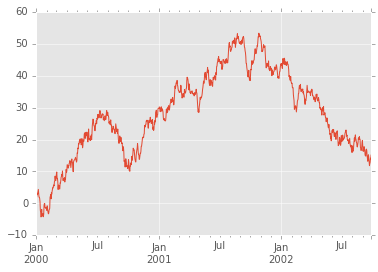

In [97]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

On DataFrame, plot() is a convenience to plot all of the columns with labels:

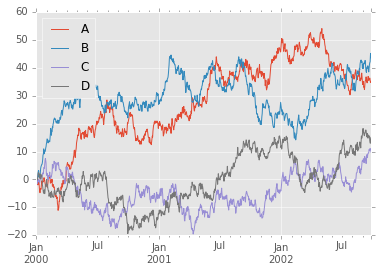

In [98]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# Getting Data In/Out
CSV
Writing to a csv file

In [99]:
df.to_csv('foo.csv')

Reading from a csv file

In [100]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.465704,1.274287,-0.487178,0.591803
1,2000-01-02,-0.383995,-0.020358,-1.470428,0.135263
2,2000-01-03,-1.789152,0.256888,-1.628919,-0.291385
3,2000-01-04,-0.863220,0.244060,-1.459112,0.005129
4,2000-01-05,-1.901651,0.411927,0.131466,0.566589
5,2000-01-06,-1.937859,1.977193,-0.124184,1.648106
6,2000-01-07,-0.766730,2.870476,-0.878956,2.407024
7,2000-01-08,0.057473,3.163933,-0.078219,1.907836
8,2000-01-09,-0.987921,0.864250,-0.610355,1.945164
9,2000-01-10,-3.013303,1.311703,-0.535503,1.994174


HDF5 - Reading and writing to HDFStores

In [101]:
df.to_hdf('foo.h5','df')

In [102]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.465704,1.274287,-0.487178,0.591803
2000-01-02,-0.383995,-0.020358,-1.470428,0.135263
2000-01-03,-1.789152,0.256888,-1.628919,-0.291385
2000-01-04,-0.863220,0.244060,-1.459112,0.005129
2000-01-05,-1.901651,0.411927,0.131466,0.566589
2000-01-06,-1.937859,1.977193,-0.124184,1.648106
2000-01-07,-0.766730,2.870476,-0.878956,2.407024
2000-01-08,0.057473,3.163933,-0.078219,1.907836
2000-01-09,-0.987921,0.864250,-0.610355,1.945164
2000-01-10,-3.013303,1.311703,-0.535503,1.994174
